In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

churndata = pd.read_csv(r'C:\Users\Aaliyah Smith\Desktop\Data Cleaning\churn_raw_data.csv')


In [2]:
#Describe Churn Dataset
churndata.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [3]:
#Count of Missing Data for each column
churndata.isna().sum()


CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B3F7F4B38>]],
      dtype=object)

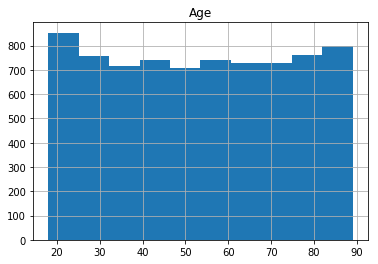

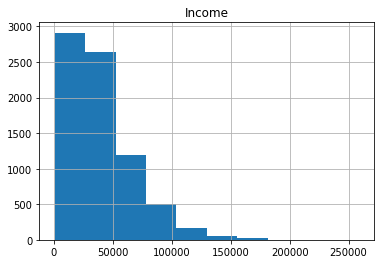

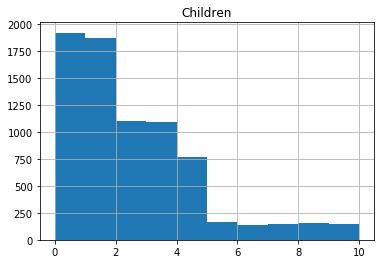

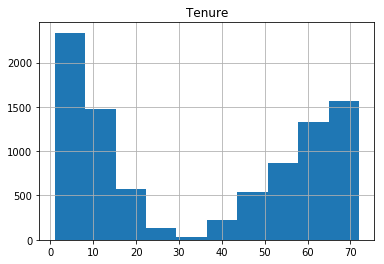

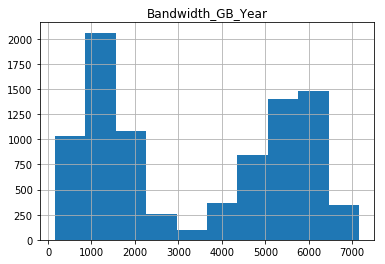

In [4]:
#Check Missing Column Distribution to determine type of imputation
churndata.hist(['Age']) #uniform 
churndata.hist(['Income'])#skewed
churndata.hist(['Children'])#skewed
churndata.hist(['Tenure'])#bimodial
churndata.hist(['Bandwidth_GB_Year'])#bimodal

In [5]:
#Replace Missing Values -Numeric
churndata['Income'].fillna(churndata['Income'].median(),inplace = True)
churndata['Children'].fillna(churndata['Children'].median(),inplace = True)
churndata['Tenure'].fillna(churndata['Tenure'].mean(),inplace = True)
churndata['Bandwidth_GB_Year'].fillna(churndata['Bandwidth_GB_Year'].mean(),inplace = True)
churndata['Age'].fillna(churndata['Age'].mean(),inplace = True)



In [6]:
#Replace Missing Values -Categorical
TechieMode = max(list(churndata['Techie']), key = list(churndata['Techie']).count)
PhoneMode = max(list(churndata['Phone']), key = list(churndata['Phone']).count)
TechSupportMode = max(list(churndata['TechSupport']), key = list(churndata['TechSupport']).count)

churndata['Techie'].fillna(TechieMode,inplace = True)
churndata['Phone'].fillna(PhoneMode,inplace = True)
churndata['TechSupport'].fillna(TechSupportMode,inplace = True)


In [7]:
#MissingDataCount
churndata.isna().sum()


CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

In [8]:
#Check for duplicates
churndata.duplicated().sum()

0

In [9]:
#Recategorize Categorical data to numeric
#Area
churndata['Area'] = churndata['Area'].replace(['Urban'],0)
churndata['Area'] = churndata['Area'].replace(['Suburban'],1)
churndata['Area'] = churndata['Area'].replace(['Rural'],2)
#Employment
churndata['Employment'] = churndata['Employment'].replace(['Unemployed'],0)
churndata['Employment'] = churndata['Employment'].replace(['Full Time'],1)
churndata['Employment'] = churndata['Employment'].replace(['Part Time'],2)
churndata['Employment'] = churndata['Employment'].replace(['Retired'],3)
churndata['Employment'] = churndata['Employment'].replace(['Student'],4)
#Marital
churndata['Marital'] = churndata['Marital'].replace(['Never Married'],0)
churndata['Marital'] = churndata['Marital'].replace(['Married'],1)
churndata['Marital'] = churndata['Marital'].replace(['Divorced'],2)
churndata['Marital'] = churndata['Marital'].replace(['Separated'],3)
churndata['Marital'] = churndata['Marital'].replace(['Widowed'],4)
#Gender
churndata['Gender'] = churndata['Gender'].replace(['Male'],0)
churndata['Gender'] = churndata['Gender'].replace(['Female'],1)
churndata['Gender'] = churndata['Gender'].replace(['Prefer not to answer'],2)
#Churn
churndata['Churn'] = churndata['Churn'].replace(['No'],0)
churndata['Churn'] = churndata['Churn'].replace(['Yes'],1)
#Techie
churndata['Techie'] = churndata['Techie'].replace(['No'],0)
churndata['Techie'] = churndata['Techie'].replace(['Yes'],1)
#Contract
churndata['Contract'] = churndata['Contract'].replace(['Month-to-month'],0)
churndata['Contract'] = churndata['Contract'].replace(['One year'],1)
churndata['Contract'] = churndata['Contract'].replace(['Two Year'],2)
#Port_modem
churndata['Port_modem'] = churndata['Port_modem'].replace(['No'],0)
churndata['Port_modem'] = churndata['Port_modem'].replace(['Yes'],1)
#Tablet
churndata['Tablet'] = churndata['Tablet'].replace(['No'],0)
churndata['Tablet'] = churndata['Tablet'].replace(['Yes'],1)
#InternetService
churndata['InternetService'] = churndata['InternetService'].replace(['None'],0)
churndata['InternetService'] = churndata['InternetService'].replace(['Fiber Optic'],1)
churndata['InternetService'] = churndata['InternetService'].replace(['DSL'],2)
#Phone
churndata['Phone'] = churndata['Phone'].replace(['No'],0)
churndata['Phone'] = churndata['Phone'].replace(['Yes'],1)
#Multiple
churndata['Multiple'] = churndata['Multiple'].replace(['No'],0)
churndata['Multiple'] = churndata['Multiple'].replace(['Yes'],1)
#Online Security
churndata['OnlineSecurity'] = churndata['OnlineSecurity'].replace(['No'],0)
churndata['OnlineSecurity'] = churndata['OnlineSecurity'].replace(['Yes'],1)
#Online Backup
churndata['OnlineBackup'] = churndata['OnlineBackup'].replace(['No'],0)
churndata['OnlineBackup'] = churndata['OnlineBackup'].replace(['Yes'],1)
#DeviceProtection
churndata['DeviceProtection'] = churndata['DeviceProtection'].replace(['No'],0)
churndata['DeviceProtection'] = churndata['DeviceProtection'].replace(['Yes'],1)
#TechSupport
churndata['TechSupport'] = churndata['TechSupport'].replace(['No'],0)
churndata['TechSupport'] = churndata['TechSupport'].replace(['Yes'],1)
#StreamingTV
churndata['StreamingTV'] = churndata['StreamingTV'].replace(['No'],0)
churndata['StreamingTV'] = churndata['StreamingTV'].replace(['Yes'],1)
#StreamingMovies
churndata['StreamingMovies'] = churndata['StreamingMovies'].replace(['No'],0)
churndata['StreamingMovies'] = churndata['StreamingMovies'].replace(['Yes'],1)
#PaperlessBilling
churndata['PaperlessBilling'] = churndata['PaperlessBilling'].replace(['No'],0)
churndata['PaperlessBilling'] = churndata['PaperlessBilling'].replace(['Yes'],1)
#PaymentMethod
churndata['PaymentMethod'] = churndata['PaymentMethod'].replace(['Credit Card (automatic)'],0)
churndata['PaymentMethod'] = churndata['PaymentMethod'].replace(['Bank Transfer(automatic)'],1)
churndata['PaymentMethod'] = churndata['PaymentMethod'].replace(['Mailed Check'],2)
churndata['PaymentMethod'] = churndata['PaymentMethod'].replace(['Electronic Check'],3)
#Education
churndata['Education'] = churndata['Education'].replace(['9th Grade to 12th Grade, No Diploma'],2)
churndata['Education'] = churndata['Education'].replace(["Associate's Degree"],7)
churndata['Education'] = churndata['Education'].replace(["Bachelor's Degree"],8)
churndata['Education'] = churndata['Education'].replace(["Doctorate Degree"],11)
churndata['Education'] = churndata['Education'].replace(['GED or Alternative Credential'],4)
churndata['Education'] = churndata['Education'].replace(["Master's Degree"],9)
churndata['Education'] = churndata['Education'].replace(["No Schooling Completed"],0)
churndata['Education'] = churndata['Education'].replace(["Nursery School to 8th Grade"],1)
churndata['Education'] = churndata['Education'].replace(["Professional School Degree"],10)
churndata['Education'] = churndata['Education'].replace(["Regular High School Diploma"],3)
churndata['Education'] = churndata['Education'].replace(["Some College, 1 or More Years, No Degree"],6)
churndata['Education'] = churndata['Education'].replace(["Some College, Less than 1 Year"],5)


In [10]:
churndatanumeric = churndata

In [11]:
#churndatanumeric.drop(['CaseOrder','Customer_id','Interaction','City','State','County','Zip','Lat','Lng','Timezone','Job'],axis = 1,inplace = True)

In [12]:
#Create Z-Score for every numeric column 
cl = churndata[list(churndata.loc[:,'Population':'Area']) + list(churndata.loc[:,'Children':'item8'])]
for column in cl:
    col_zscore = column + '_zscore'
    churndatanumeric[col_zscore] = (churndatanumeric[column] - churndatanumeric[column].mean())/churndatanumeric[column].std(ddof=0)
    
    

In [13]:
churndata

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge_zscore,Bandwidth_GB_Year_zscore,item1_zscore,item2_zscore,item3_zscore,item4_zscore,item5_zscore,item6_zscore,item7_zscore,item8_zscore
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,-0.060613,-1.203462e+00,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,1.589348,-1.253425e+00,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,-0.337752,-6.485236e-01,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,-1.242158,-5.955119e-01,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,-0.538041,-1.508895e+00,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,...,0.238275,-1.138413e+00,-0.472948,-0.488213,-0.473770,-1.459886,0.494844,-0.481165,-0.495406,-0.481828
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,...,0.599737,-7.196725e-01,2.417934,1.444922,2.444730,0.489878,-2.432648,1.453943,1.449268,1.462596
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,...,-1.368975,-1.167239e+00,-1.436576,-1.454781,-1.446603,1.464761,-1.456817,-0.481165,0.476931,1.462596
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,...,-1.285604,-1.006445e+00,1.454307,0.478354,0.499063,-0.485004,0.494844,-0.481165,0.476931,0.490384
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,20193,...,-0.255485,-1.394416e+00,-1.436576,-1.454781,-1.446603,-1.459886,1.470674,-1.448719,-0.495406,-0.481828


In [15]:
#Create Outlier Dataframes
PopulationOutlier = churndata.query('Population_zscore > 3 | Population_zscore < -3')
AreaOutlier = churndata.query('Area_zscore > 3 | Area_zscore < -3')
ChildrenOutlier = churndata.query('Children_zscore > 3 | Children_zscore < -3')
AgeOutlier = churndata.query('Age_zscore > 3 | Age_zscore < -3')
EducationOutlier = churndata.query('Education_zscore > 3 | Education_zscore < -3')
EmploymentOutlier = churndata.query('Employment_zscore > 3 | Employment_zscore < -3')
IncomeOutlier = churndata.query('Income_zscore > 3 | Income_zscore < -3')
MaritalOutlier = churndata.query('Marital_zscore > 3 | Marital_zscore < -3')
GenderOutlier = churndata.query('Gender_zscore > 3 | Gender_zscore < -3')
OutageOutlier = churndata.query('Outage_sec_perweek_zscore > 3 | Outage_sec_perweek_zscore < -3')
EmailOutlier = churndata.query('Email_zscore > 3 | Email_zscore < -3')
ContactsOutlier = churndata.query('Contacts_zscore > 3 | Contacts_zscore < -3')
YearlyEquipFailureOutlier = churndata.query('Yearly_equip_failure_zscore > 3 | Yearly_equip_failure_zscore < -3')
TechieOutlier = churndata.query('Techie_zscore > 3 | Techie_zscore < -3')
ContractOutlier = churndata.query('Contract_zscore > 3 | Contract_zscore < -3')
PortModemOutlier = churndata.query('Port_modem_zscore > 3 | Port_modem_zscore < -3')
TabletOutlier = churndata.query('Tablet_zscore > 3 | Tablet_zscore < -3')
InternetServiceOutlier = churndata.query('InternetService_zscore > 3 | InternetService_zscore < -3')
PhoneOutlier = churndata.query('Phone_zscore > 3 | Phone_zscore < -3')
MultipleOutlier = churndata.query('Multiple_zscore > 3 | Multiple_zscore < -3')
OnlineSecurityOutlier = churndata.query('OnlineSecurity_zscore > 3 | OnlineSecurity_zscore < -3')
OnlineBackupOutlier = churndata.query('OnlineBackup_zscore > 3 | OnlineBackup_zscore < -3')
DeviceProtectionOutlier = churndata.query('DeviceProtection_zscore > 3 | DeviceProtection_zscore < -3')
TechSupportOutlier = churndata.query('TechSupport_zscore > 3 | TechSupport_zscore < -3')
StreamingTVOutlier = churndata.query('StreamingTV_zscore > 3 | StreamingTV_zscore < -3')
StreamingMoviesOutlier = churndata.query('StreamingMovies_zscore > 3 | StreamingMovies_zscore < -3')
PaperlessBillingOutlier = churndata.query('PaperlessBilling_zscore > 3 | PaperlessBilling_zscore < -3')
PaymentMethodOutlier = churndata.query('PaymentMethod_zscore > 3 | PaymentMethod_zscore < -3')
TenureOutlier = churndata.query('Tenure_zscore > 3 | Tenure_zscore < -3')
MonthlyChargeOutlier = churndata.query('MonthlyCharge_zscore > 3 | MonthlyCharge_zscore < -3')
BandwidthOutlier = churndata.query('Bandwidth_GB_Year_zscore > 3 | Bandwidth_GB_Year_zscore < -3')
Item1Outlier = churndata.query('item1_zscore > 3 | item1_zscore < -3')
Item2Outlier = churndata.query('item2_zscore > 3 | item2_zscore < -3')
Item3Outlier = churndata.query('item3_zscore > 3 | item3_zscore < -3')
Item4Outlier = churndata.query('item4_zscore > 3 | item4_zscore < -3')
Item5Outlier = churndata.query('item5_zscore > 3 | item5_zscore < -3')
Item6Outlier = churndata.query('item6_zscore > 3 | item6_zscore < -3')
Item7Outlier = churndata.query('item7_zscore > 3 | item7_zscore < -3')
Item8Outlier = churndata.query('item8_zscore > 3 | item8_zscore < -3')


In [16]:
#Import required libraries for PCA 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
numericchurndata = churndata[['Population', 'Area', 
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8']]

In [18]:
numericchurndata.to_csv('numeric.csv')

In [19]:
numericchurndata_normalized = (numericchurndata-numericchurndata.mean())/numericchurndata.std()

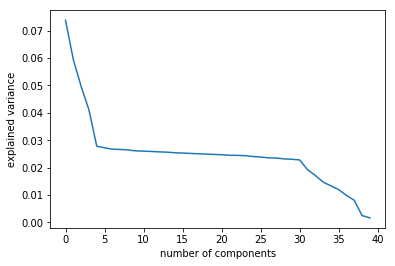

In [20]:
pca = PCA(n_components = numericchurndata.shape[1])
pca.fit(numericchurndata_normalized)
churndata_pca = pd.DataFrame(pca.transform(numericchurndata_normalized)),
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
    'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'
]
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

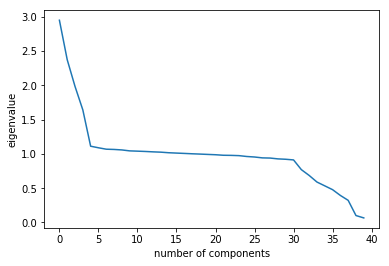

In [21]:
cov_matrix = np.dot(numericchurndata_normalized.T,numericchurndata_normalized)/numericchurndata.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()
#PC1 - PC30 Should be kept since their eigenvalue is greater than 1

In [22]:
loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
    'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40'
],
index =numericchurndata.columns)
loadings
loadings.to_csv('loadings.csv')

In [23]:
cleanchurn = churndata.loc[:,'CaseOrder':'item8']

In [24]:
#Extract cleanchurn dataframe to a csv file
cleanchurn.to_csv('clean_churn.csv')